In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [10]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [11]:
NUM_CLASSES = 11

# Dataset reading

In [12]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [13]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(66, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(33, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 66)             │         2,838 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 33)             │         2,211 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           374 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,423 (21.18 KB)

 Trainable params: 5,423 (21.18 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


13/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1139 - loss: 2.3969
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1209 - loss: 2.3710 - val_accuracy: 0.2680 - val_loss: 2.1890
Epoch 2/1000
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1484 - loss: 2.2627
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2139 - loss: 2.2081 - val_accuracy: 0.3547 - val_loss: 2.0064
Epoch 3/1000
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 2.0589 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2979 - loss: 2.0560 - val_accuracy: 0.4276 - val_loss: 1.8305
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3396 - loss: 1.9198 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━

In [36]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9388 - loss: 0.3555


In [37]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [38]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[0.00282297 0.00721539 0.35347396 0.02029645 0.01472395 0.01869464
 0.00723575 0.01934358 0.42028955 0.1267762  0.00912756]
8


# Confusion matrix

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


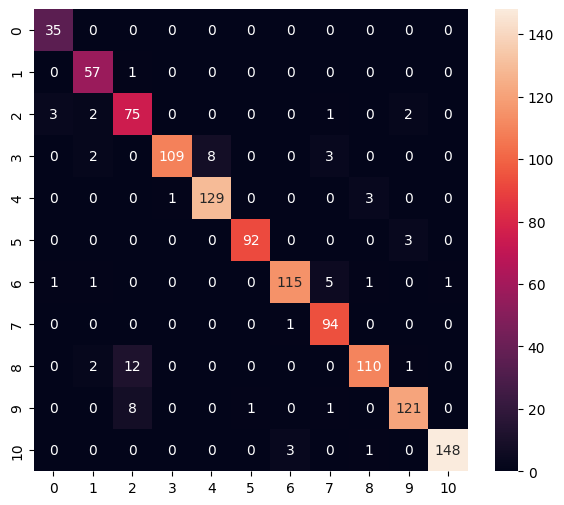

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       0.89      0.98      0.93        58
           2       0.78      0.90      0.84        83
           3       0.99      0.89      0.94       122
           4       0.94      0.97      0.96       133
           5       0.99      0.97      0.98        95
           6       0.97      0.93      0.95       124
           7       0.90      0.99      0.94        95
           8       0.96      0.88      0.92       125
           9       0.95      0.92      0.94       131
          10       0.99      0.97      0.98       152

    accuracy                           0.94      1153
   macro avg       0.93      0.95      0.94      1153
weighted avg       0.94      0.94      0.94      1153



In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [40]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [41]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmps2wq2iuy\assets


INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmps2wq2iuy\assets


Saved artifact at 'C:\Users\barun\AppData\Local\Temp\tmps2wq2iuy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2031591085200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031591092688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031591085392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031591082896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031591085968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031591088080: TensorSpec(shape=(), dtype=tf.resource, name=None)


10192

# Inference test

In [42]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [43]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [44]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [45]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00286299 0.0067802  0.35274482 0.02009769 0.01462327 0.01774896
 0.00710451 0.01928444 0.42479905 0.1254609  0.00849321]
8
